# <span style="color:orange">K-Means Clustering</span>

### <span style="color:orange">Importing the Libraries</span>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import linestyle

### <span style="color:orange">Importing the Dataset</span>

In [3]:
dataset = pd.read_csv('Dataset\\Mall_Customers.csv')

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
input_features = dataset.iloc[ : , [3, 4] ].values

### <span style="color:orange">Using the Elbow Method to find the Optimal Number of Clusters</span>

In [6]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init="k-means++", random_state=42)
    k_means.fit(input_features)
    wcss.append(k_means.inertia_)

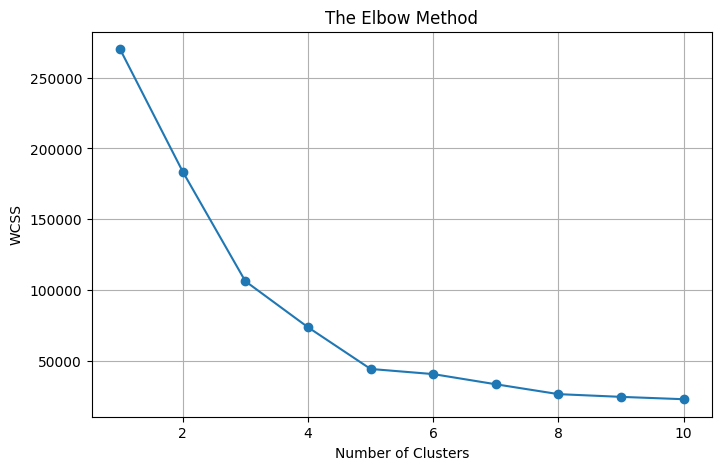

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### <span style="color:orange">Training the k-means model on the dataset</span>

In [11]:
k_means = KMeans(n_clusters=5, init="k-means++", random_state=42)
dv_kmeans = k_means.fit_predict(input_features)

In [12]:
print(dv_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


### <span style="color:orange">Visualizing the Clusters</span>

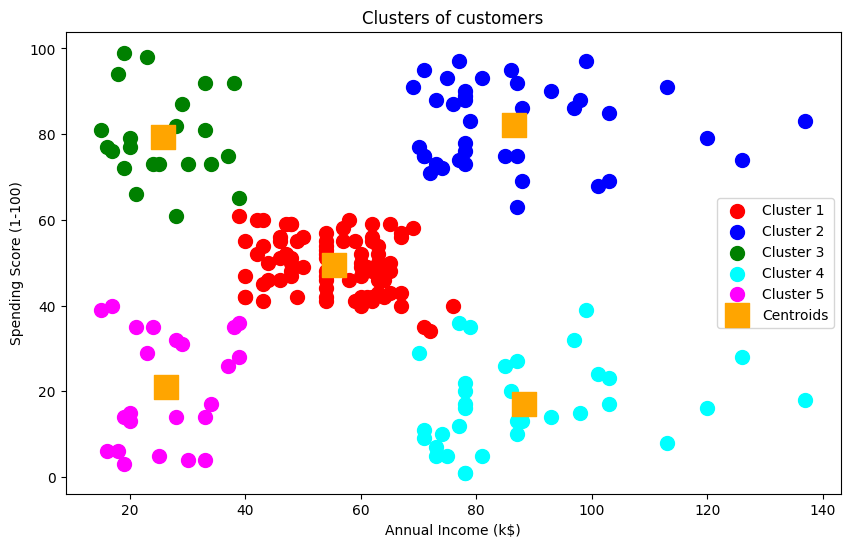

In [19]:
plt.figure(figsize=(10, 6) )
plt.scatter(input_features[dv_kmeans == 0, 0], input_features[dv_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(input_features[dv_kmeans == 1, 0], input_features[dv_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(input_features[dv_kmeans == 2, 0], input_features[dv_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(input_features[dv_kmeans == 3, 0], input_features[dv_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(input_features[dv_kmeans == 4, 0], input_features[dv_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(k_means.cluster_centers_[ : , 0], k_means.cluster_centers_[ : , 1], s=300, c='orange', label='Centroids', marker='s') # // s for square
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

___